<h1>EE7204 Assignment 01</h1>
<body>EG/2018/3335 - Gunawardhana S.D.H.C.</body>

***1. Write a Python program to reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.***

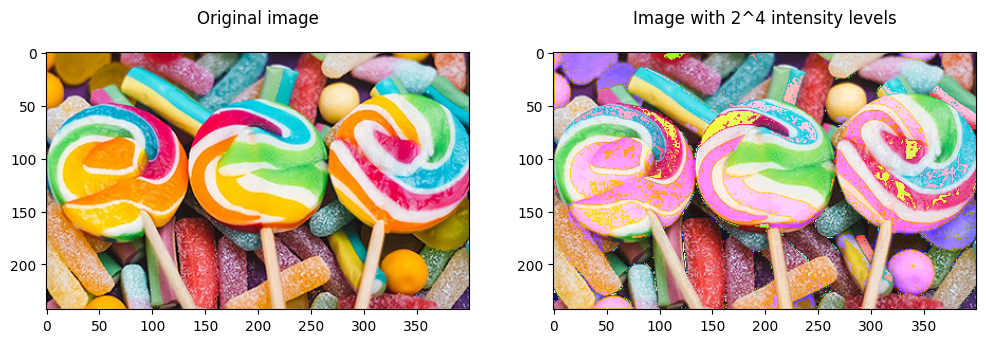

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to colours
original_Image = cv2.cvtColor(cv2.imread('Candy.jpg'), cv2.COLOR_BGR2RGB)

# Get desired number of intensity levels from user and handeling invalid inputs
while True:
    try:
        desired_levels = int(input("Enter the desired number of intensity levels from 1 to 8: "))
        if desired_levels>=1 and desired_levels<=8:
            break
        else:
            print("Value should be between 1 and 8")
    except ValueError:
        print("Invalid input. Please enter an integer.")

# Reduce number of levels
adjusted_Image = np.round(((np.round(((original_Image + 1) / 256) * (2 ** desired_levels)) / (2 ** desired_levels)) * 256) - 1).astype(np.uint8)

# Show the image
fig, axs = plt.subplots(1, 2, figsize=(12,6))

# Display the original image in the first subplot
axs[0].imshow(original_Image)
axs[0].set_title("Original image\n")

# Display the reduced intensity image in the second subplot
axs[1].imshow(adjusted_Image)
axs[1].set_title("Image with 2^{} intensity levels\n".format(desired_levels))
plt.show()

* Comments: The image becomes less detailed and the contrast is reducing because no. of different shades of colors or grey in the image is reducing. which ultimately makes it harder to distinguish between different features in the image. 

***2. Write a Python program to load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood.***


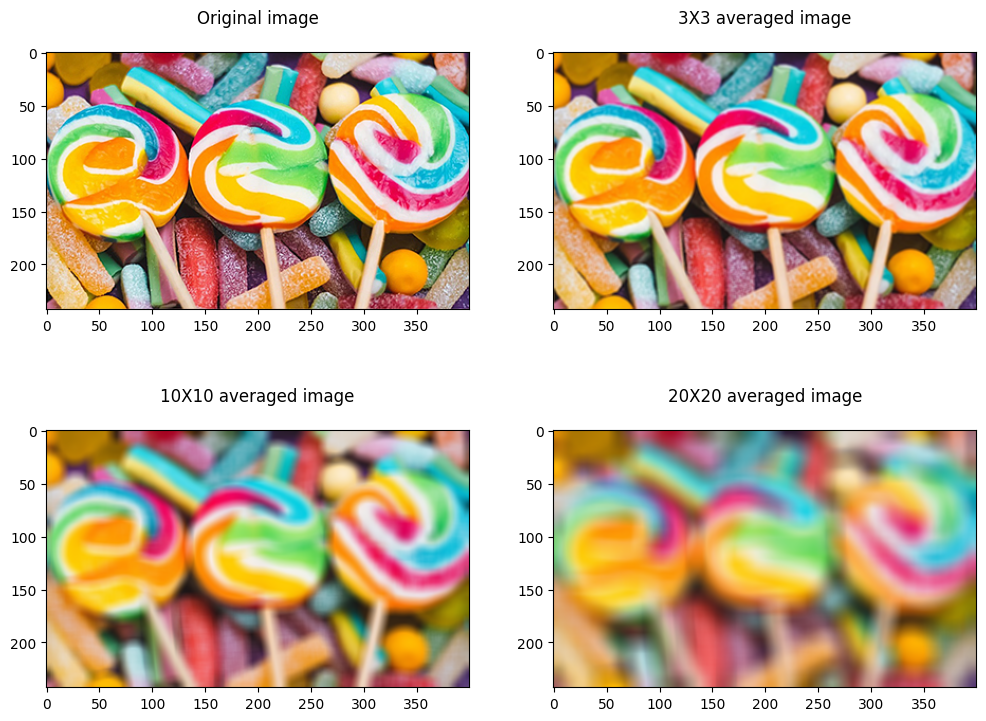

In [2]:
# Define the 3x3 kernel
kernel_3x3 = np.full((3,3), 1/9)
kernel_10x10 = np.full((10,10), 1/100)
kernel_20x20 = np.full((20,20), 1/400)

# simple spatial average of image pixels
im_avg_3x3 = cv2.filter2D(original_Image,-1,kernel_3x3)
im_avg_10x10 = cv2.filter2D(original_Image,-1,kernel_10x10)
im_avg_20x20 = cv2.filter2D(original_Image,-1,kernel_20x20)

# Plot the original and averaged images
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
axs[0,0].imshow(original_Image)
axs[0,0].set_title("Original image\n")

axs[0,1].imshow(im_avg_3x3)
axs[0,1].set_title("3X3 averaged image\n")

axs[1,0].imshow(im_avg_10x10)
axs[1,0].set_title("10X10 averaged image\n")

axs[1,1].imshow(im_avg_20x20)
axs[1,1].set_title("20X20 averaged image\n")

plt.show()

* Comments: When the kernel size is increasing, the image becomes more blurred and the edges is dissapearing. Which makes it harder to understand the features of the image.

***3. Write a Python program to rotate an image by 45 and 90 degrees.***

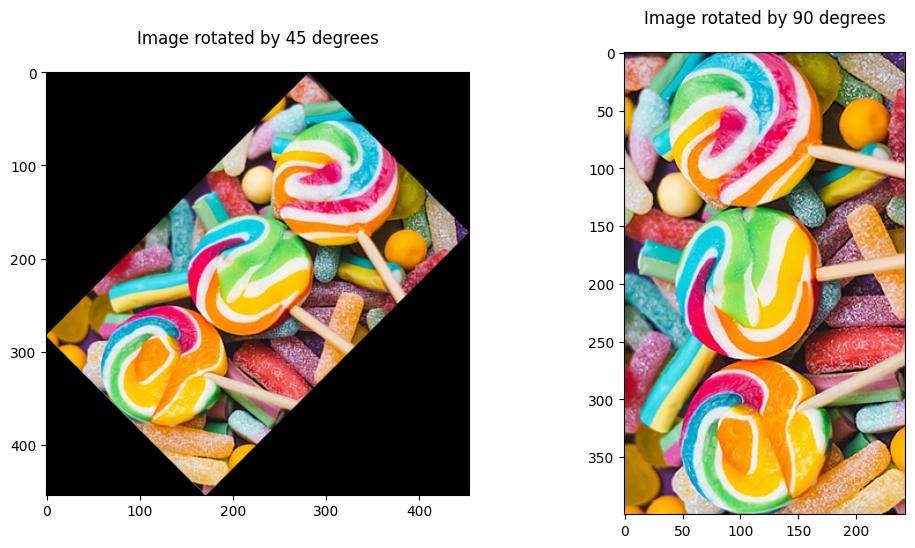

In [3]:
# Height and width of the image
height, width = original_Image.shape[:2]

# Center of the image
center = (width/2, height/2)

# Rotation matrix
rotation_matrix_45 = cv2.getRotationMatrix2D(center, 45, 1)
rotation_matrix_90 = cv2.getRotationMatrix2D(center, 90, 1)

# New size of the rotated image (for 45 rotation)
new_dimention = int((height + width)/np.sqrt(2))
rotation_matrix_45[0, 2] += (new_dimention / 2) - center[0]
rotation_matrix_45[1, 2] += (new_dimention / 2) - center[1]

# New size of the rotated image (for 90 rotation)
rotation_matrix_90[0, 2] += (height / 2) - center[0]
rotation_matrix_90[1, 2] += (width / 2) - center[1]

# Rotate the image without cropping the corners
rotated_img_45 = cv2.warpAffine(original_Image, rotation_matrix_45, (new_dimention, new_dimention), flags=cv2.INTER_LINEAR)
rotated_img_90 = cv2.warpAffine(original_Image, rotation_matrix_90, (height, width), flags=cv2.INTER_LINEAR)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Display the 45 rotated image in the first subplot
ax1.imshow(rotated_img_45)
ax1.set_title("Image rotated by 45 degrees\n")

#  Display the 90 rotated image in the first subplot
ax2.imshow(rotated_img_90)
ax2.set_title("Image rotated by 90 degrees\n")
plt.show()

* Comments: When rotating the image by 45 degrees, the size of the resultant image have to be increased or otherwise the corners of the original image will be cropped out. When rotating the image by 90 degrees, the width and height is interchanged in the resultant image. Apart from that, there are no changes done to the images by this opearation.

***4. Write a Python program to replace all corresponding 9 pixels by their average for every 3×3 block of the image without overlapping. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks.***

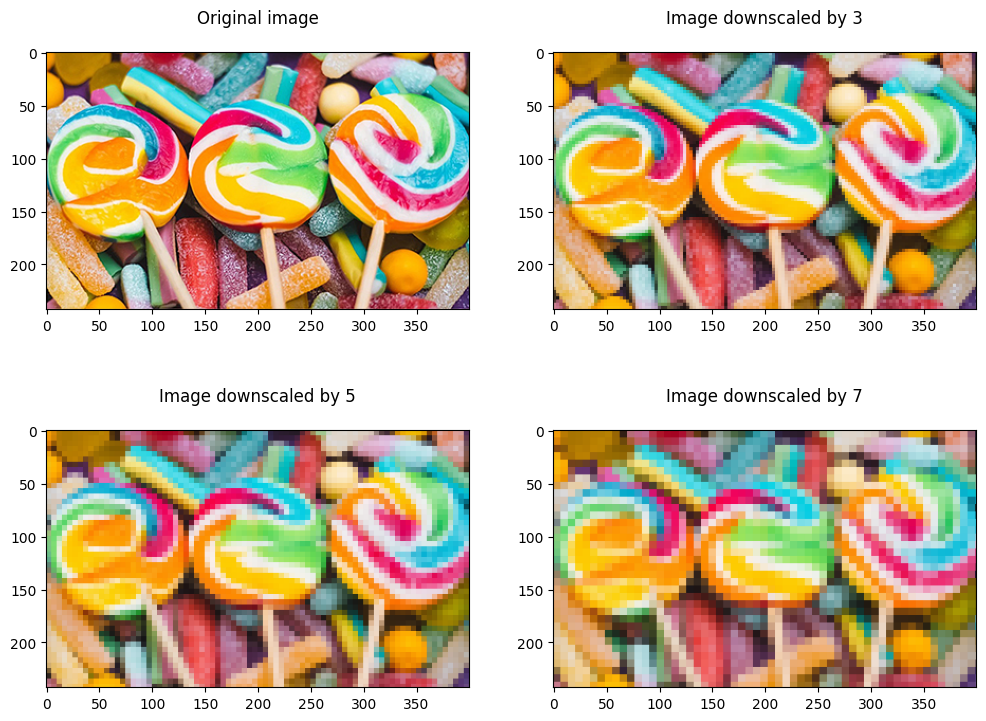

In [4]:
# Create new output images with corresponding sizes
replaced_3X3 = np.zeros((height, width, 3), dtype=np.uint8)
replaced_5X5 = np.zeros((height, width, 3), dtype=np.uint8)
replaced_7X7 = np.zeros((height, width, 3), dtype=np.uint8)

# Defining a common function for averaging block of a given size
def average (image, fact):
    for i in range(0, height, fact):
        for j in range(0, width, fact):
            block = original_Image[i:i+fact, j:j+fact]
            # Calculate the average of each fact x fact block
            avg = block.mean(axis=(0,1))
            image[i:i+fact, j:j+fact] = avg

# Averaging 3x3 block           
average(replaced_3X3, 3)

# Averaging 5x5 block  
average(replaced_5X5, 5)

# Averaging 7x7 block  
average(replaced_7X7, 7)

# Plot the original and downscaled images
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
axs[0,0].imshow(original_Image)
axs[0,0].set_title("Original image\n")

axs[0,1].imshow(replaced_3X3)
axs[0,1].set_title("Image downscaled by 3\n")

axs[1,0].imshow(replaced_5X5)
axs[1,0].set_title("Image downscaled by 5\n")

axs[1,1].imshow(replaced_7X7)
axs[1,1].set_title("Image downscaled by 7\n")

plt.show()

* Comments: When the block size is increasing, the resolution and some fine details of the resultant image is decreasing. But now, the image size can be reduced in the downscaled image which can be benificial in storing images.